# Insurance Claim Prediction

## An insurance policy is an agreement between a company and a customer by which a company undertakes to provide a guarantee of compensation for specified loss, damage or illness in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.


## Predict whether the policyholder will file a claim in the next 6 months or not.





### Problem Statement



#### CarIns is a startup that provides insurance for cars. It is one of the best car insurance brands known for the highest claim settlement ratio. It was launched back in Oct 2020 and acquired its initial policyholders by providing a hassle-free claim process, instant policy issuance, and claim settlements at minimum coverages.


#### As it's a fast growing startup, the company would like to optimize the cost of the insurance by identifying the policyholders who are more likely to claim in the next 6 months. 

#### Now the company would like to use Data Science to identify the policyholders whose chances of filing a claim are high in the next 6 months. The company challenges the Data Science community to build a high-performance algorithm to predict if the policyholder will file a claim in the next 6 months or not based on the set of car and policy features.





### About the Dataset



#### You are provided with information on policyholders containing the attributes like policy tenure, age of the car, age of the car owner, population density of the city, make and model of the car, power, engine type, etc and the target variable indicating whether the policyholder files a claim in the next 6 months or not.




In [5]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    mean_absolute_error, 
    mean_squared_error,
     r2_score
)
from sklearn import metrics

from sklearn.model_selection import train_test_split, StratifiedKFold,RepeatedStratifiedKFold,KFold,cross_val_score

# To reduce dimensionality
from sklearn.decomposition import PCA

# Shap-hypertune  for simultaneous Hyperparameters Tuning and Features Selection 

try:
    from shaphypetune import BoostSearch, BoostBoruta, BoostRFE, BoostRFA
except:
    !pip install --upgrade shap-hypetune
    from shaphypetune import BoostSearch, BoostBoruta, BoostRFE, BoostRFA

from hyperopt import hp
from hyperopt import Trials

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder,PolynomialFeatures

# To impute missing values
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# To do hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from imblearn import FunctionSampler
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# To select the most important features to use for modelling
from sklearn.feature_selection import RFECV

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,AdaBoostRegressor,
    GradientBoostingClassifier,GradientBoostingRegressor,
    RandomForestClassifier,RandomForestRegressor,
    BaggingClassifier,BaggingRegressor,
    StackingClassifier,StackingRegressor,
    ExtraTreesClassifier,ExtraTreesRegressor,
    VotingClassifier,
    
    
)   
from sklearn.svm import SVC,SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.naive_bayes import BernoulliNB
from sklearn.dummy import DummyClassifier



from xgboost import XGBClassifier ,XGBRegressor
from lightgbm import LGBMClassifier,LGBMRegressor
!pip3 install catboost
from catboost import CatBoostClassifier,CatBoostRegressor
!pip3 install optuna
import optuna


!pip3 install verstack
!pip install --upgrade verstack
from verstack import LGBMTuner
from verstack import NaNImputer
from verstack import ThreshTuner
from verstack import FeatureSelector
from verstack import MeanTargetEncoder, OneHotEncoder, Factorizer, FrequencyEncoder
from verstack.stratified_continuous_split import scsplit

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To suppress warnings
import warnings

warnings.filterwarnings("ignore")

# This will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

     ---------------------------------------- 9.7/9.7 MB 72.2 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for verstack: filename=verstack-3.6.0-py3-none-any.whl size=94643 sha256=3efcf9ea52147162d15f49679cb6fb8b19741942bbec69014fc50f7571a3493b
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\f9\67\c7\0be06ef268ab42d4c2cbe8b74c20ba6160c8f9f8f1ffeff7bd
Successfully built verstack
  Attempting uninstall: verstack
    Found existing installation: verstack 3.5.1
    Uninstalling verstack-3.5.1:
      Successfully uninstalled verstack-3.5.1


In [12]:
data=pd.read_csv('train.csv')
data1=pd.read_csv('test.csv')

In [18]:
data[['length']].describe().T

,count,mean,std,min,25%,50%,75%,max
length,58592.000,3850.477,311.457,3445.000,3445.000,3845.000,3995.000,4300.000


In [3]:
data.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.516,0.050,0.644,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.600,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.673,0.020,0.375,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.600,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841,0.020,0.385,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.600,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900,0.110,0.433,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.800,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596,0.110,0.635,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.000,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [4]:
data1.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,ID58593,0.342,0.000,0.587,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.600,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0
1,ID58594,0.307,0.130,0.442,C8,8794,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2,No,Yes,No,Yes,No,Drum,1197,4,Manual,5,Electric,4.800,3845,1735,1530,1335,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
2,ID58595,0.328,0.120,0.452,C8,8794,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.000,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2
3,ID58596,0.783,0.010,0.462,C5,34738,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.600,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0
4,ID58597,1.233,0.020,0.635,C5,34738,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.600,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0


In [5]:
data.is_esc.nunique()

2

In [6]:
data.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.516,0.050,0.644,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.600,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.673,0.020,0.375,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.600,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841,0.020,0.385,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.600,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900,0.110,0.433,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.800,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596,0.110,0.635,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.000,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [7]:
data.duplicated().sum()

0

In [8]:
data1.duplicated().sum()

0

In [9]:
data.isnull().sum()/data.isnull().count()*100

policy_id                          0.000
policy_tenure                      0.000
age_of_car                         0.000
age_of_policyholder                0.000
area_cluster                       0.000
population_density                 0.000
make                               0.000
segment                            0.000
model                              0.000
fuel_type                          0.000
max_torque                         0.000
max_power                          0.000
engine_type                        0.000
airbags                            0.000
is_esc                             0.000
is_adjustable_steering             0.000
is_tpms                            0.000
is_parking_sensors                 0.000
is_parking_camera                  0.000
rear_brakes_type                   0.000
displacement                       0.000
cylinder                           0.000
transmission_type                  0.000
gear_box                           0.000
steering_type   

In [10]:
data1.isnull().sum()/data1.isnull().count()*100

policy_id                          0.000
policy_tenure                      0.000
age_of_car                         0.000
age_of_policyholder                0.000
area_cluster                       0.000
population_density                 0.000
make                               0.000
segment                            0.000
model                              0.000
fuel_type                          0.000
max_torque                         0.000
max_power                          0.000
engine_type                        0.000
airbags                            0.000
is_esc                             0.000
is_adjustable_steering             0.000
is_tpms                            0.000
is_parking_sensors                 0.000
is_parking_camera                  0.000
rear_brakes_type                   0.000
displacement                       0.000
cylinder                           0.000
transmission_type                  0.000
gear_box                           0.000
steering_type   

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [12]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39063 entries, 0 to 39062
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         39063 non-null  object 
 1   policy_tenure                     39063 non-null  float64
 2   age_of_car                        39063 non-null  float64
 3   age_of_policyholder               39063 non-null  float64
 4   area_cluster                      39063 non-null  object 
 5   population_density                39063 non-null  int64  
 6   make                              39063 non-null  int64  
 7   segment                           39063 non-null  object 
 8   model                             39063 non-null  object 
 9   fuel_type                         39063 non-null  object 
 10  max_torque                        39063 non-null  object 
 11  max_power                         39063 non-null  object 
 12  engi

In [13]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
policy_id,58592,58592,ID00001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
policy_tenure,58592.000,NaN,NaN,NaN,0.611,0.414,0.003,0.210,0.574,1.039,1.397
age_of_car,58592.000,NaN,NaN,NaN,0.069,0.057,0.000,0.020,0.060,0.110,1.000
age_of_policyholder,58592.000,NaN,NaN,NaN,0.469,0.123,0.288,0.365,0.452,0.548,1.000
area_cluster,58592,22,C8,13654,NaN,NaN,NaN,NaN,NaN,NaN,NaN
population_density,58592.000,NaN,NaN,NaN,18826.859,17660.175,290.000,6112.000,8794.000,27003.000,73430.000
make,58592.000,NaN,NaN,NaN,1.764,1.137,1.000,1.000,1.000,3.000,5.000
segment,58592,6,B2,18314,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model,58592,11,M1,14948,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fuel_type,58592,3,Petrol,20532,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
data.shape,data1.shape

((58592, 44), (39063, 43))

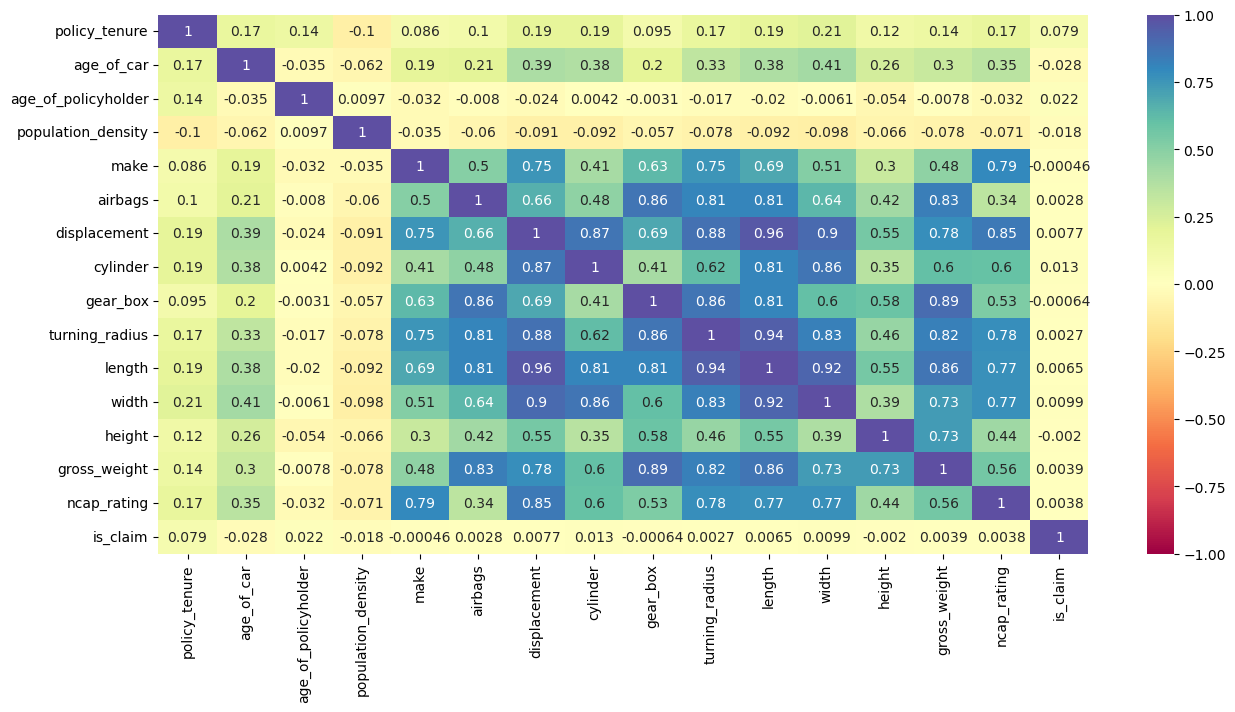

In [15]:
# Heatmap to check the correlation between numerical data

plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

In [16]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels 

data['is_front_fog_lights']=label_encoder.fit_transform(data['is_front_fog_lights'])
data['is_rear_window_wiper']=label_encoder.fit_transform(data['is_rear_window_wiper'])
data['is_rear_window_washer']=label_encoder.fit_transform(data['is_rear_window_washer'])
data['is_rear_window_defogger']=label_encoder.fit_transform(data['is_rear_window_defogger'])
data['is_brake_assist']=label_encoder.fit_transform(data['is_brake_assist'])
data['is_power_door_locks']=label_encoder.fit_transform(data['is_power_door_locks'])
data['is_central_locking']=label_encoder.fit_transform(data['is_central_locking'])
data['is_power_steering']=label_encoder.fit_transform(data['is_power_steering'])
data['is_driver_seat_height_adjustable']=label_encoder.fit_transform(data['is_driver_seat_height_adjustable'])
data['is_day_night_rear_view_mirror']=label_encoder.fit_transform(data['is_day_night_rear_view_mirror'])
data['is_ecw']=label_encoder.fit_transform(data['is_ecw'])
data['is_speed_alert']=label_encoder.fit_transform(data['is_speed_alert'])

data['is_adjustable_steering']=label_encoder.fit_transform(data['is_adjustable_steering'])
data['is_tpms']=label_encoder.fit_transform(data['is_tpms'])
data['is_parking_sensors']=label_encoder.fit_transform(data['is_parking_sensors'])
data['is_parking_camera']=label_encoder.fit_transform(data['is_parking_camera'])
#data['is_esc']=label_encoder.fit_transform(data['is_esc'])
    
    
    
data1['is_front_fog_lights']=label_encoder.fit_transform(data1['is_front_fog_lights'])
data1['is_rear_window_wiper']=label_encoder.fit_transform(data1['is_rear_window_wiper'])
data1['is_rear_window_washer']=label_encoder.fit_transform(data1['is_rear_window_washer'])
data1['is_rear_window_defogger']=label_encoder.fit_transform(data1['is_rear_window_defogger'])
data1['is_brake_assist']=label_encoder.fit_transform(data1['is_brake_assist'])
data1['is_power_door_locks']=label_encoder.fit_transform(data1['is_power_door_locks'])
data1['is_central_locking']=label_encoder.fit_transform(data1['is_central_locking'])
data1['is_power_steering']=label_encoder.fit_transform(data1['is_power_steering'])
data1['is_driver_seat_height_adjustable']=label_encoder.fit_transform(data1['is_driver_seat_height_adjustable'])
data1['is_day_night_rear_view_mirror']=label_encoder.fit_transform(data1['is_day_night_rear_view_mirror'])
data1['is_ecw']=label_encoder.fit_transform(data1['is_ecw'])
data1['is_speed_alert']=label_encoder.fit_transform(data1['is_speed_alert'])
data1['is_adjustable_steering']=label_encoder.fit_transform(data1['is_adjustable_steering'])
data1['is_tpms']=label_encoder.fit_transform(data1['is_tpms'])
data1['is_parking_sensors']=label_encoder.fit_transform(data1['is_parking_sensors'])
data1['is_parking_camera']=label_encoder.fit_transform(data1['is_parking_camera'])
#data1['is_esc']=label_encoder.fit_transform(data1['is_esc'])

In [17]:
data.drop('policy_id',axis=1,inplace=True)
data1.drop('policy_id',axis=1,inplace=True)

0    54844
1     3748
Name: is_claim, dtype: int64


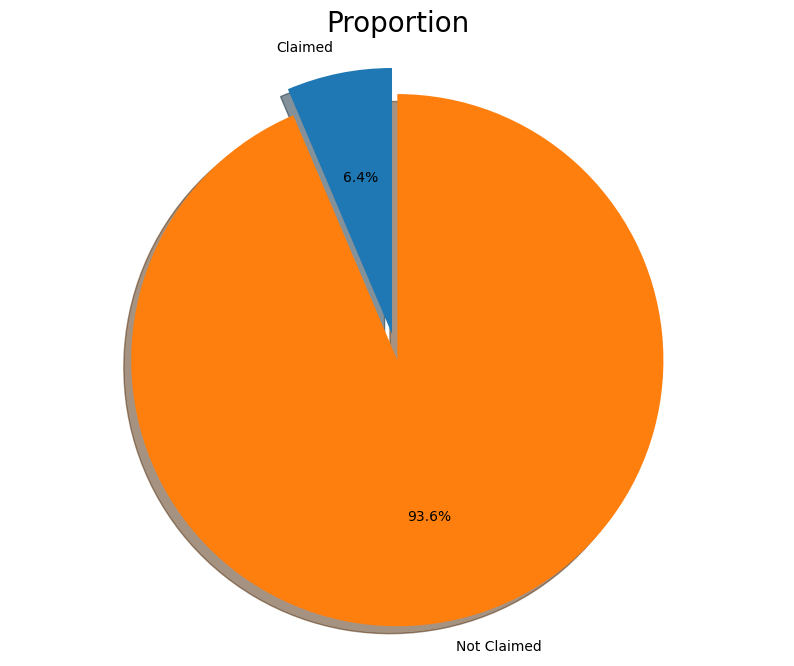

In [18]:
print(data.is_claim.value_counts())
labels = 'Claimed', 'Not Claimed'
#sizes = [ds.is_promoted[ds['is_promoted']==1].count(), ds.is_promoted[ds['is_promoted']==0].count()]
sizes = [data.is_claim[data['is_claim']==1].count(),data.is_claim[data['is_claim']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion", size = 20)
plt.show()

In [19]:
df=data.copy()

In [20]:
df.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0.516,0.050,0.644,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,0,0,1,0,Drum,796,3,Manual,5,Power,4.600,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,0.673,0.020,0.375,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,0,0,1,0,Drum,796,3,Manual,5,Power,4.600,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,0.841,0.020,0.385,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,0,0,1,0,Drum,796,3,Manual,5,Power,4.600,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,0.900,0.110,0.433,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,1,0,1,1,Drum,1197,4,Automatic,5,Electric,4.800,3995,1735,1515,1335,1,0,0,1,1,1,1,1,1,1,1,1,2,0
4,0.596,0.110,0.635,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,0,0,0,1,Drum,999,3,Automatic,5,Electric,5.000,3731,1579,1490,1155,0,0,0,0,0,1,1,1,0,1,1,1,2,0


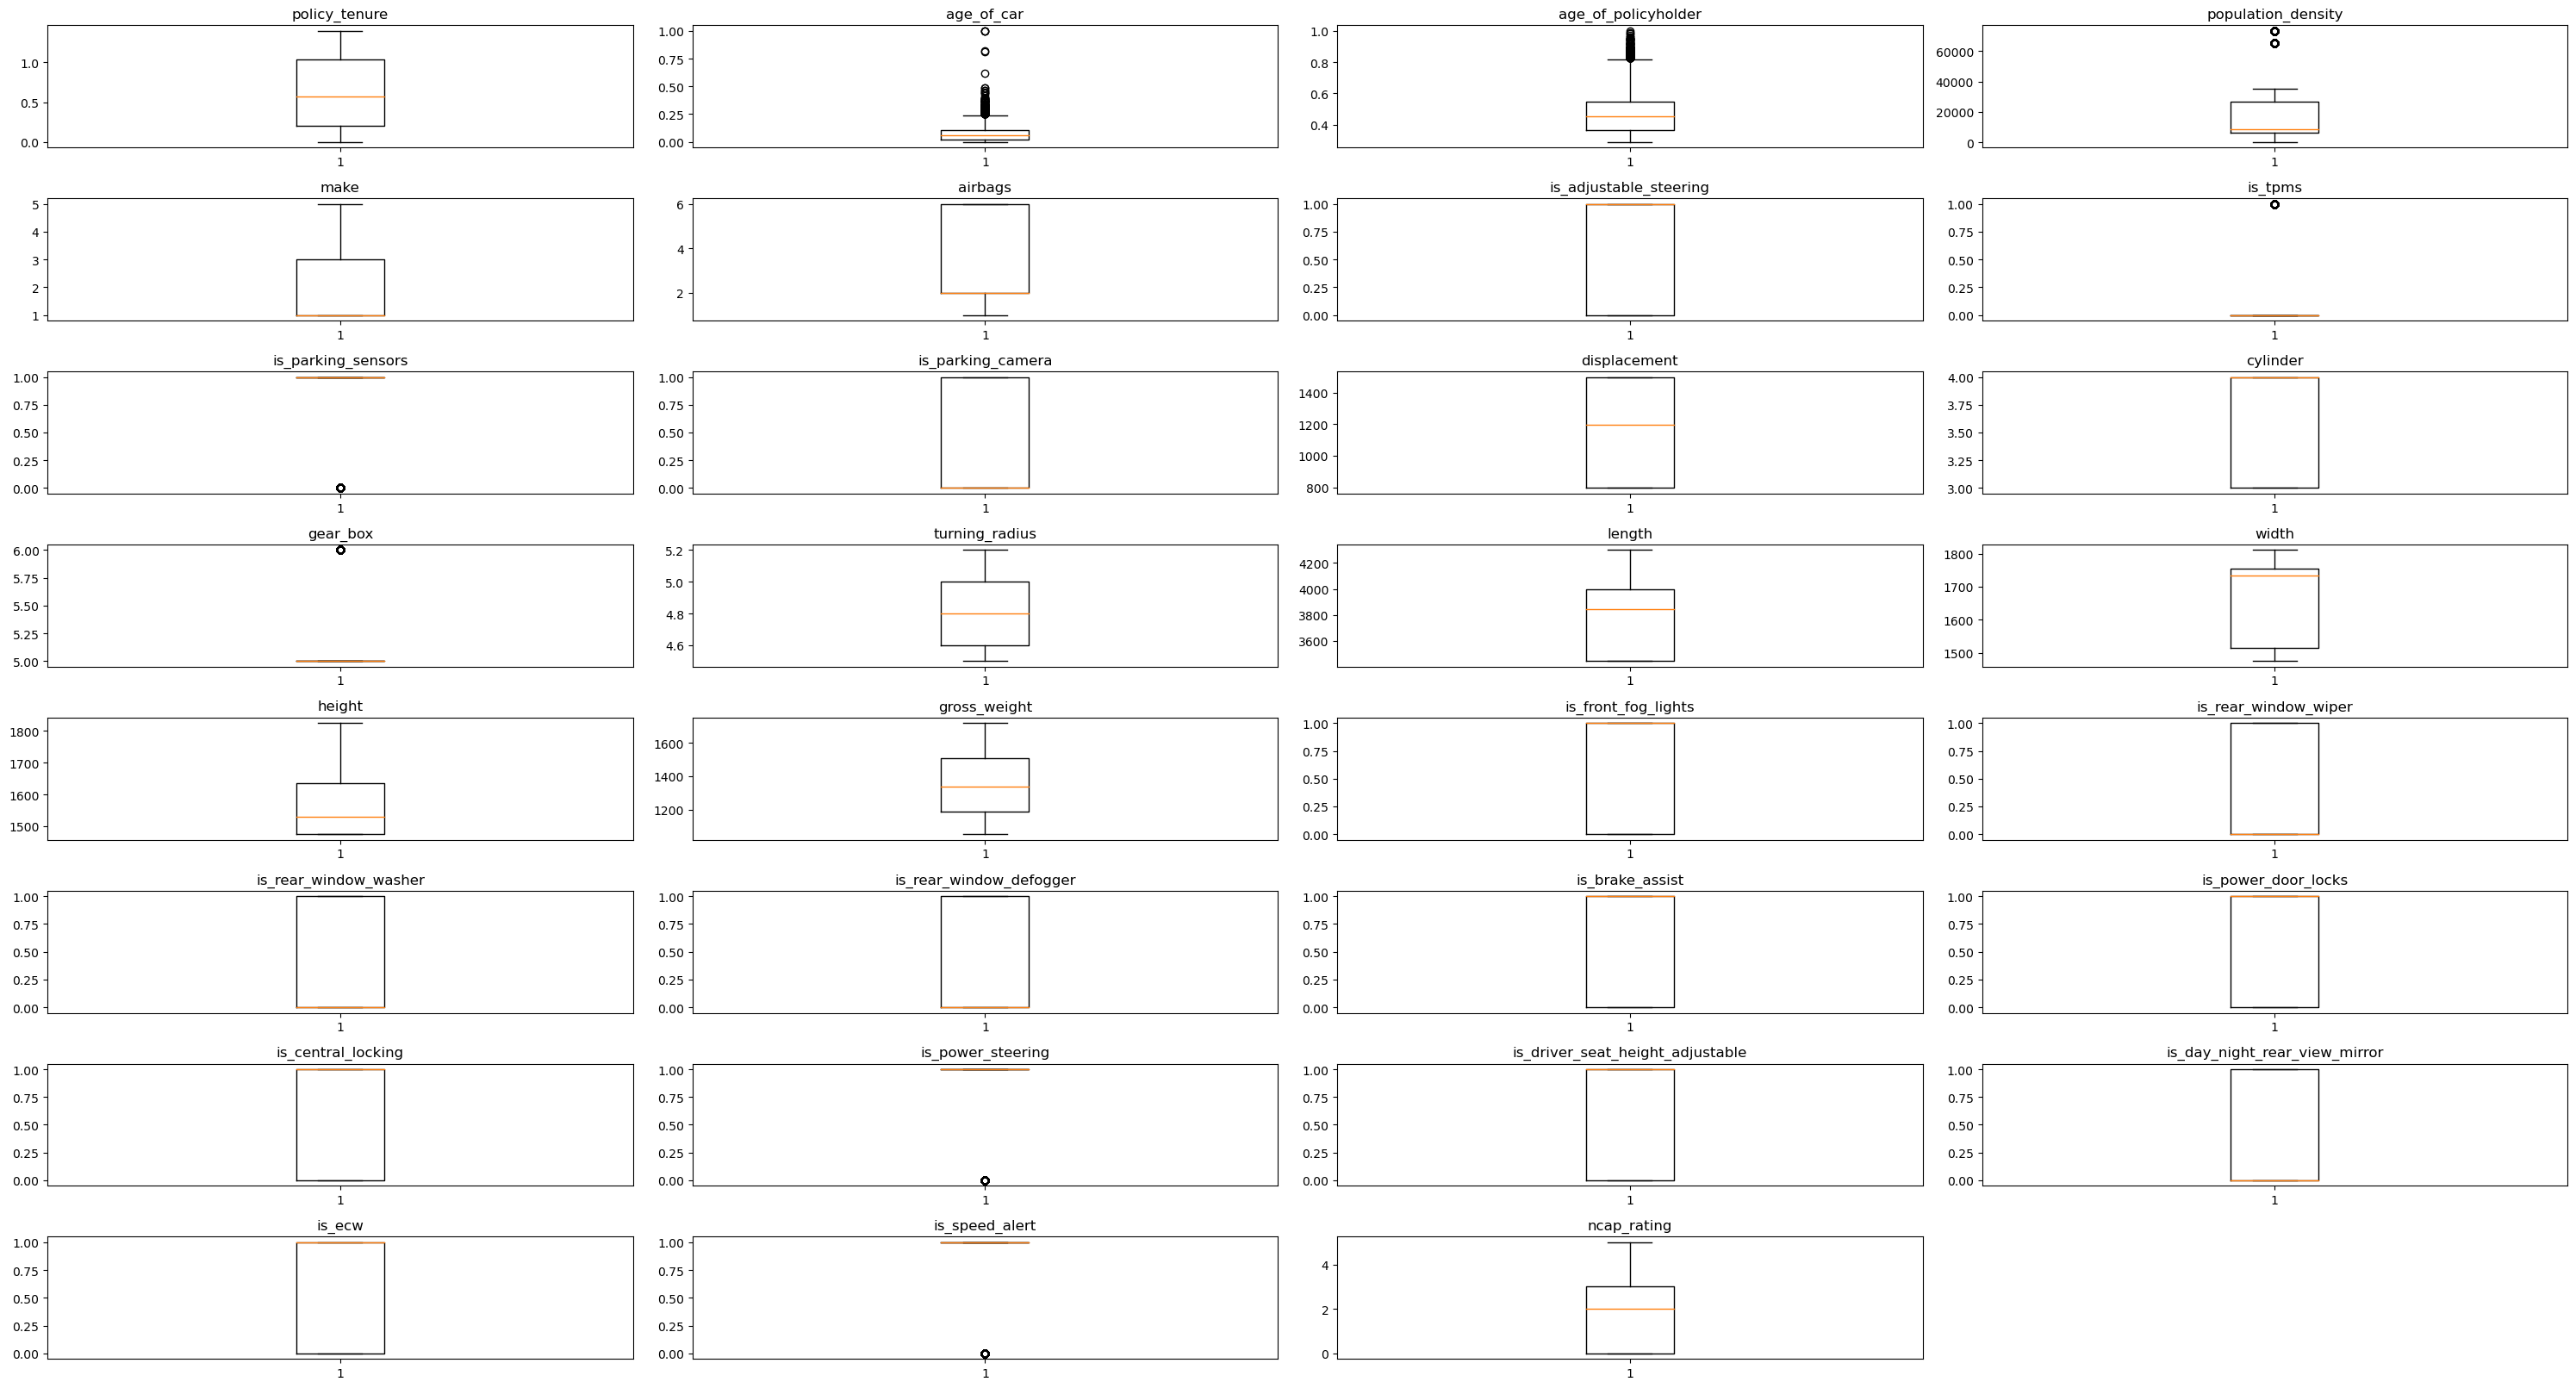

In [21]:
# outlier detection using boxplot
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
numerical_col.remove('is_claim')
plt.figure(figsize=(30, 20))


for i, variable in enumerate(numerical_col):
    plt.subplot(10, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [22]:
# to find the 25th percentile and 75th percentile for the numerical columns.
Q1 = df[numerical_col].quantile(0.25)
Q3 = df[numerical_col].quantile(0.75)

IQR = Q3 - Q1                   #Inter Quantile Range (75th percentile - 25th percentile)

lower_whisker = Q1 - 1.5*IQR    #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper_whisker = Q3 + 1.5*IQR

In [23]:
# Percentage of outliers in each column
((df[numerical_col] < lower_whisker) | (df[numerical_col] > upper_whisker)).sum()/df.shape[0]*100

policy_tenure                       0.000
age_of_car                          0.459
age_of_policyholder                 0.377
population_density                  6.224
make                                0.000
airbags                             0.000
is_adjustable_steering              0.000
is_tpms                            23.925
is_parking_sensors                  4.050
is_parking_camera                   0.000
displacement                        0.000
cylinder                            0.000
gear_box                           24.544
turning_radius                      0.000
length                              0.000
width                               0.000
height                              0.000
gross_weight                        0.000
is_front_fog_lights                 0.000
is_rear_window_wiper                0.000
is_rear_window_washer               0.000
is_rear_window_defogger             0.000
is_brake_assist                     0.000
is_power_door_locks               

In [24]:
df.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0.516,0.050,0.644,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,0,0,1,0,Drum,796,3,Manual,5,Power,4.600,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,0.673,0.020,0.375,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,0,0,1,0,Drum,796,3,Manual,5,Power,4.600,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,0.841,0.020,0.385,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,0,0,1,0,Drum,796,3,Manual,5,Power,4.600,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,0.900,0.110,0.433,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,1,0,1,1,Drum,1197,4,Automatic,5,Electric,4.800,3995,1735,1515,1335,1,0,0,1,1,1,1,1,1,1,1,1,2,0
4,0.596,0.110,0.635,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,0,0,0,1,Drum,999,3,Automatic,5,Electric,5.000,3731,1579,1490,1155,0,0,0,0,0,1,1,1,0,1,1,1,2,0


In [25]:
df['new_feature']= (df['max_torque'].astype(str) + "_" + df['max_power'].astype(str))
df.drop(['max_torque','max_power'],axis=1,inplace=True)
data1['new_feature']= (data1['max_torque'].astype(str) + "_" + data1['max_power'].astype(str))
data1.drop(['max_torque','max_power'],axis=1,inplace=True)

df['new_feature1']= (df['fuel_type'].astype(str) + "_" + df['engine_type'].astype(str))
df.drop(['fuel_type','engine_type'],axis=1,inplace=True)
data1['new_feature1']= (data1['fuel_type'].astype(str) + "_" + data1['engine_type'].astype(str))
data1.drop(['fuel_type','engine_type'],axis=1,inplace=True)


df['new_feature2']= (df['segment'].astype(str) + "_" + df['model'].astype(str))
df.drop(['segment','model'],axis=1,inplace=True)
data1['new_feature2']= (data1['segment'].astype(str) + "_" + data1['model'].astype(str))
data1.drop(['segment','model'],axis=1,inplace=True)



In [26]:
df.shape,data1.shape

((58592, 40), (39063, 39))

In [27]:
# Dividing train data into X and y 
X=df.drop('is_claim',axis=1)
y=df['is_claim']


In [28]:
# Splitting data into training, validation and test sets:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.1, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.20, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape,data1.shape)

(42185, 39) (10547, 39) (5860, 39) (39063, 39)


In [29]:
from verstack import MeanTargetEncoder, OneHotEncoder, Factorizer, FrequencyEncoder

# Mean-target-encode all the categoric columns
object_cols = X_train.select_dtypes(include = 'O').columns
binary_cols = [col for col in object_cols if X_train[col].nunique() == 2]
cat_cols = [col for col in object_cols if col not in binary_cols]

# encode binary_cols:
for col in binary_cols:
    encoder = Factorizer()
    X_train = encoder.fit_transform(X_train, col)
    X_val = encoder.transform(X_val)
    X_test = encoder.transform(X_test)
    data1 = encoder.transform(data1)
# -----------------------------------------------------------------------------
    # frequency encoding
for col in cat_cols:
    encoder = FrequencyEncoder()
    encoded_col_X_train = encoder.fit_transform(X_train, col)[col]
    encoded_col_X_val = encoder.transform(X_val)[col]
    encoded_col_X_test = encoder.transform(X_test)[col]
    encoded_col_data1 = encoder.transform(data1)[col]
    encoded_col_X_train.name += '_FREQ'
    encoded_col_X_val.name += '_FREQ'
    encoded_col_X_test.name += '_FREQ'
    encoded_col_data1.name += '_FREQ'
    X_train = pd.concat([X_train, encoded_col_X_train], axis = 1)
    X_val = pd.concat([X_val, encoded_col_X_val], axis = 1)
    X_test = pd.concat([X_test, encoded_col_X_test], axis = 1)
    data1 = pd.concat([data1, encoded_col_data1], axis = 1)
    
    # factorization 
for col in cat_cols:
    encoder = Factorizer()
    encoded_col_X_train = encoder.fit_transform(X_train, col)[col]
    encoded_col_X_val = encoder.transform(X_val)[col]
    encoded_col_X_test = encoder.transform(X_test)[col]
    encoded_col_data1 = encoder.transform(data1)[col]
    encoded_col_X_train.name += '_FAC'
    encoded_col_X_val.name += '_FAC'
    encoded_col_X_test.name += '_FAC'
    encoded_col_data1.name += '_FAC'
    X_train = pd.concat([X_train, encoded_col_X_train], axis = 1)
    X_val = pd.concat([X_val, encoded_col_X_val], axis = 1)
    X_test = pd.concat([X_test, encoded_col_X_test], axis = 1)
    data1 = pd.concat([data1, encoded_col_data1], axis = 1)
    
    # one-hot-encoding
for col in cat_cols:
    encoder = OneHotEncoder()
    X_train = encoder.fit_transform(X_train, col, prefix = col)
    X_val = encoder.transform(X_val)
    X_test = encoder.transform(X_test)
    data1 = encoder.transform(data1)

In [31]:
print(X_train.shape, X_val.shape, X_test.shape,data1.shape)

(42185, 100) (10547, 100) (5860, 100) (39063, 100)


Engineering new features

In [33]:
param_grid = {
    'max_depth': [None, 2, 3, 4,5,730],
    'criterion':['gini', 'entropy', 'log_loss'],
    'min_samples_split':[2,4,5,7,9,10,30]
}

model = GridSearchCV(
    DecisionTreeClassifier(random_state=11),
    cv=10,
    scoring='neg_mean_squared_error',
    param_grid=param_grid
)

selected_features = ['length', 'width', 'height','gross_weight']
model.fit(X_train[selected_features], y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=11),
             param_grid = {
    'max_depth': [None, 2, 3, 4],
    'criterion':['gini', 'entropy', 'log_loss'],
    'min_samples_split':[2,4,5,7,9]
},
             scoring='neg_mean_squared_error')

X_train = X_train.assign(length_width_height=model.predict(X_train[selected_features]))
X_val = X_val.assign(length_width_height=model.predict(X_val[selected_features]))
X_test = X_test.assign(length_width_height=model.predict(X_test[selected_features]))
data1 = data1.assign(length_width_height=model.predict(data1[selected_features]))

In [34]:
%%time

param_grid = {
    'max_depth': [None, 2, 3, 4,5,730],
    'criterion':['gini', 'entropy', 'log_loss'],
    'min_samples_split':[2,4,5,7,9,10,30]
}

model = GridSearchCV(
    DecisionTreeClassifier(random_state=11),
    cv=10,
    scoring='neg_mean_squared_error',
    param_grid=param_grid
)

selected_features = ['policy_tenure', 'age_of_car', 'age_of_policyholder','population_density']
model.fit(X_train[selected_features], y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=11),
             param_grid = {
    'max_depth': [None, 2, 3, 4],
    'criterion':['gini', 'entropy', 'log_loss'],
    'min_samples_split':[2,4,5,7,9]
},
             scoring='neg_mean_squared_error')

X_train = X_train.assign(abc=model.predict(X_train[selected_features]))
X_val = X_val.assign(abc=model.predict(X_val[selected_features]))
X_test = X_test.assign(abc=model.predict(X_test[selected_features]))
data1 = data1 .assign(abc=model.predict(data1 [selected_features]))

CPU times: total: 2min 22s
Wall time: 2min 28s


In [ ]:
%%time

param_grid = {
    'max_depth': [None, 2, 3, 4,5,730],
    'criterion':['gini', 'entropy', 'log_loss'],
    'min_samples_split':[2,4,5,7,9,10,30]
}

model = GridSearchCV(
    DecisionTreeClassifier(random_state=11),
    cv=10,
    scoring='neg_mean_squared_error',
    param_grid=param_grid
)

selected_features = ['area_cluster_FREQ', 'steering_type_FREQ', 'new_feature_FREQ','population_density','new_feature1_FREQ','new_feature2_FREQ']
model.fit(X_train[selected_features], y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=11),
             param_grid = {
    'max_depth': [None, 2, 3, 4],
    'criterion':['gini', 'entropy', 'log_loss'],
    'min_samples_split':[2,4,5,7,9]
},
             scoring='neg_mean_squared_error')

X_train = X_train.assign(FREQt=model.predict(X_train[selected_features]))
X_val = X_val.assign(FREQt=model.predict(X_val[selected_features]))
X_test = X_test.assign(FREQ=model.predict(X_test[selected_features]))
data1 = data1.assign(FREQ=model.predict(data1[selected_features]))

In [35]:
X_train = X_train.assign(length_width_height=model.predict(X_train[selected_features]))
X_test = X_test.assign(length_width_height=model.predict(X_test[selected_features]))


X_train = X_train.assign(abc=model.predict(X_train[selected_features]))
X_test = X_test.assign(abc=model.predict(X_test[selected_features]))

#X_train = X_train.assign(FREQt=model.predict(X_train[selected_features]))
#X_test = X_test.assign(FREQ=model.predict(X_test[selected_features]))

In [36]:
X_train.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,area_cluster_FREQ,steering_type_FREQ,new_feature_FREQ,new_feature1_FREQ,new_feature2_FREQ,area_cluster_FAC,steering_type_FAC,new_feature_FAC,new_feature1_FAC,new_feature2_FAC,area_cluster_C1,area_cluster_C10,area_cluster_C11,area_cluster_C12,area_cluster_C13,area_cluster_C14,area_cluster_C15,area_cluster_C16,area_cluster_C17,area_cluster_C18,area_cluster_C19,area_cluster_C2,area_cluster_C20,area_cluster_C21,area_cluster_C22,area_cluster_C3,area_cluster_C4,area_cluster_C5,area_cluster_C6,area_cluster_C7,area_cluster_C8,area_cluster_C9,steering_type_Electric,steering_type_Manual,steering_type_Power,new_feature_113Nm@4400rpm_88.50bhp@6000rpm,new_feature_170Nm@4000rpm_118.36bhp@5500rpm,new_feature_200Nm@1750rpm_97.89bhp@3600rpm,new_feature_200Nm@3000rpm_88.77bhp@4000rpm,new_feature_250Nm@2750rpm_113.45bhp@4000rpm,new_feature_60Nm@3500rpm_40.36bhp@6000rpm,new_feature_82.1Nm@3400rpm_55.92bhp@5300rpm,new_feature_85Nm@3000rpm_61.68bhp@6000rpm,new_feature_91Nm@4250rpm_67.06bhp@5500rpm,new_feature1_CNG_F8D Petrol Engine,new_feature1_CNG_G12B,new_feature1_CNG_K10C,new_feature1_Diesel_1.5 L U2 CRDi,new_feature1_Diesel_1.5 Turbocharged Revotorq,new_feature1_Diesel_i-DTEC,new_feature1_Petrol_1.0 SCe,new_feature1_Petrol_1.2 L K Series Engine,new_feature1_Petrol_1.2 L K12N Dualjet,new_feature1_Petrol_1.5 Turbocharged Revotron,new_feature1_Petrol_K Series Dual jet,new_feature2_A_M1,new_feature2_A_M3,new_feature2_B1_M8,new_feature2_B2_M5,new_feature2_B2_M6,new_feature2_B2_M7,new_feature2_C1_M11,new_feature2_C1_M2,new_feature2_C1_M9,new_feature2_C2_M4,new_feature2_Utility_M10,length_width_height,abc
36636,0.205,0.120,0.356,4990,3,6,0,1,1,1,1,0,1493,4,0,6,5.200,4300,1790,1635,1720,1,1,1,1,1,1,1,1,1,0,1,1,3,0.025,0.570,0.240,0.240,0.240,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
22394,0.187,0.040,0.365,4990,1,2,1,1,0,1,0,1,1197,4,1,5,4.800,3845,1735,1530,1335,1,0,0,0,1,1,1,1,1,1,1,1,2,0.025,0.409,0.304,0.235,0.235,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
29848,0.122,0.000,0.365,4076,5,2,1,1,0,1,1,1,1498,4,1,5,4.900,3995,1695,1501,1051,1,0,0,1,0,1,1,1,1,1,1,1,4,0.104,0.409,0.036,0.036,0.036,1,1,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1710,0.789,0.000,0.500,27003,1,2,1,0,0,1,0,1,998,3,1,5,4.700,3655,1620,1675,1340,0,0,0,0,0,1,1,1,0,0,1,1,2,0.125,0.570,0.071,0.071,0.071,2,0,3,3,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
53494,0.084,0.180,0.346,34738,3,6,0,1,1,1,1,0,1493,4,0,6,5.200,4300,1790,1635,1720,1,1,1,1,1,1,1,1,1,0,1,1,3,0.118,0.570,0.240,0.240,0.240,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [32]:
scaler =StandardScaler()

X_train_column_headers = list(X_train.columns.values)
X_train[X_train_column_headers] =scaler.fit_transform(X_train[X_train_column_headers])

X_val_column_headers = list(X_val.columns.values)
X_val[X_val_column_headers] =scaler.fit_transform(X_val[X_val_column_headers])

X_test_column_headers = list(X_test.columns.values)
X_test[X_test_column_headers] =scaler.fit_transform(X_test[X_test_column_headers])

data1_column_headers = list(data1.columns.values)
data1[data1_column_headers] =scaler.fit_transform(data1[data1_column_headers])

In [33]:
X_train.shape,X_val.shape,X_test.shape,data1.shape

((42185, 100), (10547, 100), (5860, 100), (39063, 100))

In [39]:
X_val.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,area_cluster_FREQ,steering_type_FREQ,new_feature_FREQ,new_feature1_FREQ,new_feature2_FREQ,area_cluster_FAC,steering_type_FAC,new_feature_FAC,new_feature1_FAC,new_feature2_FAC,area_cluster_C1,area_cluster_C10,area_cluster_C11,area_cluster_C12,area_cluster_C13,area_cluster_C14,area_cluster_C15,area_cluster_C16,area_cluster_C17,area_cluster_C18,area_cluster_C19,area_cluster_C2,area_cluster_C20,area_cluster_C21,area_cluster_C22,area_cluster_C3,area_cluster_C4,area_cluster_C5,area_cluster_C6,area_cluster_C7,area_cluster_C8,area_cluster_C9,steering_type_Electric,steering_type_Manual,steering_type_Power,new_feature_113Nm@4400rpm_88.50bhp@6000rpm,new_feature_170Nm@4000rpm_118.36bhp@5500rpm,new_feature_200Nm@1750rpm_97.89bhp@3600rpm,new_feature_200Nm@3000rpm_88.77bhp@4000rpm,new_feature_250Nm@2750rpm_113.45bhp@4000rpm,new_feature_60Nm@3500rpm_40.36bhp@6000rpm,new_feature_82.1Nm@3400rpm_55.92bhp@5300rpm,new_feature_85Nm@3000rpm_61.68bhp@6000rpm,new_feature_91Nm@4250rpm_67.06bhp@5500rpm,new_feature1_CNG_F8D Petrol Engine,new_feature1_CNG_G12B,new_feature1_CNG_K10C,new_feature1_Diesel_1.5 L U2 CRDi,new_feature1_Diesel_1.5 Turbocharged Revotorq,new_feature1_Diesel_i-DTEC,new_feature1_Petrol_1.0 SCe,new_feature1_Petrol_1.2 L K Series Engine,new_feature1_Petrol_1.2 L K12N Dualjet,new_feature1_Petrol_1.5 Turbocharged Revotron,new_feature1_Petrol_K Series Dual jet,new_feature2_A_M1,new_feature2_A_M3,new_feature2_B1_M8,new_feature2_B2_M5,new_feature2_B2_M6,new_feature2_B2_M7,new_feature2_C1_M11,new_feature2_C1_M2,new_feature2_C1_M9,new_feature2_C2_M4,new_feature2_Utility_M10,length_width_height,abc
32212,-0.280,-1.042,0.803,-0.064,-0.672,-0.621,0.676,-1.238,-0.561,0.203,-0.798,0.561,-1.365,-1.290,0.727,-0.573,-1.105,-1.293,-1.395,-0.980,-0.939,-1.171,-0.638,-0.638,-0.733,-1.105,-1.603,-1.603,0.141,-1.188,-0.780,-1.603,0.086,-1.256,-0.843,0.737,0.307,0.707,0.707,1.680,-0.830,1.337,1.140,1.140,-0.163,-0.239,-0.148,-0.169,-0.243,-0.255,-0.113,-0.081,-0.093,-0.061,-0.128,-0.379,-0.045,-0.090,-0.057,-0.343,-0.108,-0.373,-0.123,-0.202,-0.543,4.506,-0.825,-0.141,0.859,-0.659,-0.086,-0.193,-0.166,-0.561,1.685,-0.270,-0.141,-0.203,1.685,-0.141,-0.270,-0.561,-0.166,-0.193,-0.203,-0.229,-0.132,-0.086,-0.555,1.685,-0.203,-0.270,-0.166,-0.555,-0.229,-0.086,-0.132,-0.193,-0.561,-0.141,0.000,0.000
53657,-1.383,-1.218,0.259,0.892,-0.672,-0.621,0.676,-1.238,-0.561,0.203,-0.798,0.561,-1.365,-1.290,0.727,-0.573,-1.105,-1.293,-1.395,-0.980,-0.939,-1.171,-0.638,-0.638,-0.733,-1.105,-1.603,-1.603,0.141,-1.188,-0.780,-1.603,0.086,-1.256,0.096,0.737,0.307,0.707,0.707,-0.801,-0.830,1.337,1.140,1.140,-0.163,-0.239,-0.148,-0.169,-0.243,-0.255,-0.113,-0.081,-0.093,-0.061,-0.128,-0.379,-0.045,-0.090,-0.057,-0.343,-0.108,2.679,-0.123,-0.202,-0.543,-0.222,-0.825,-0.141,0.859,-0.659,-0.086,-0.193,-0.166,-0.561,1.685,-0.270,-0.141,-0.203,1.685,-0.141,-0.270,-0.561,-0.166,-0.193,-0.203,-0.229,-0.132,-0.086,-0.555,1.685,-0.203,-0.270,-0.166,-0.555,-0.229,-0.086,-0.132,-0.193,-0.561,-0.141,0.000,0.000
56759,1.204,0.369,0.492,-0.630,-0.672,-0.621,0.676,0.808,-0.561,0.203,-0.798,0.561,0.135,0.775,0.727,-0.573,-0.230,-0.013,0.560,-0.284,-0.235,0.854,-0.638,-0.638,-0.733,0.905,0.624,0.624,0.141,0.841,1.283,0.624,0.086,0.176,-0.636,-0.826,0.860,0.502,0.502,-0.594,1.039,-0.654,-0.768,-0.768,-0.163,-0.239,-0.148,-0.169,-0.243,3.928,-0.113,-0.081,-0.093,-0.061,-0.128,-0.379,-0.045,-0.090,-0.057,-0.343,-0.108,-0.373,-0.123,-0.202,-0.543,-0.222,1.212,-0.141,-1.164,1.518,-0.08

In [34]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score
    AUC = roc_auc_score(target, pred)  # to compute AUC-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
            "AUC":AUC
            
        },
        index=[0],
    )

    return df_perf

In [35]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [36]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

In [37]:
%%time 

models = []  # Empty list to store all the models

# Appending models into the list
models.append(("dtree", DecisionTreeClassifier(random_state=1)))     
models.append(("Lr", LogisticRegression(random_state=1)))
models.append(("KNeighbors",KNeighborsClassifier()))
models.append(("ExtrasTree",ExtraTreesClassifier(random_state=1)))
models.append(("ExtraTree",DecisionTreeClassifier(random_state=1)))
models.append(("RidgeClassifier",RidgeClassifier()))    
models.append(("SGDClassifier",SGDClassifier()))
models.append(("BernoulliNB",BernoulliNB())) 
models.append(("SVM",SVC()))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("LightGBM", LGBMClassifier(random_state=1)))
models.append(("Catboost", CatBoostClassifier(random_state=1,verbose=False)))




results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = RepeatedStratifiedKFold(                                              
        n_splits=5,n_repeats=3, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = f1_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

dtree: 0.09127483934148016
Lr: 0.0
KNeighbors: 0.008182777851651299
ExtrasTree: 0.029153257411403753
ExtraTree: 0.09127483934148016
RidgeClassifier: 0.0
SGDClassifier: 0.00047961630695443646
BernoulliNB: 0.0
SVM: 0.0
Bagging: 0.014390085821133044
Random forest: 0.013703961561652588
GBM: 0.0002460024600246002
Adaboost: 0.0
Xgboost: 0.0017143470224105463
LightGBM: 0.0
Catboost: 0.0007375576773055978

Validation Performance:

dtree: 0.09108402822322002
Lr: 0.0
KNeighbors: 0.01643835616438356
ExtrasTree: 0.022988505747126436
ExtraTree: 0.09108402822322002
RidgeClassifier: 0.0
SGDClassifier: 0.0
BernoulliNB: 0.0
SVM: 0.0
Bagging: 0.02412868632707775
Random forest: 0.013458950201884255
GBM: 0.0
Adaboost: 0.0
Xgboost: 0.002932551319648094
LightGBM: 0.0
Catboost: 0.0
CPU times: total: 1h 22min 4s
Wall time: 1h 8min 33s


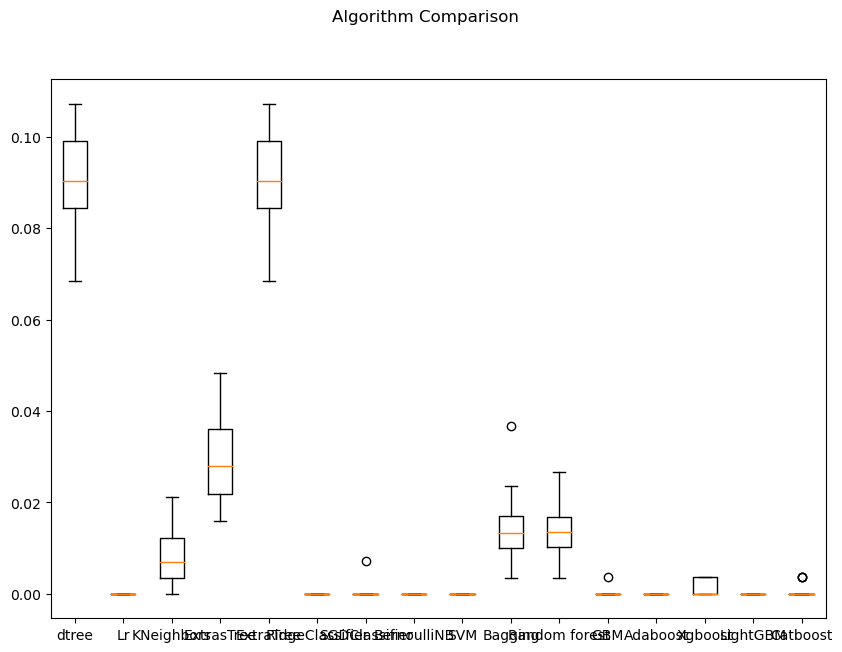

In [38]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

In [578]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After OverSampling, counts of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train_over == 0)))


print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, counts of label '1': 2698
Before OverSampling, counts of label '0': 39487 

After OverSampling, counts of label '1': 39487
After OverSampling, counts of label '0': 39487 

After OverSampling, the shape of train_X: (78974, 126)
After OverSampling, the shape of train_y: (78974,) 



In [325]:
%%time 

models = []  # Empty list to store all the models

# Appending models into the list
models.append(("dtree", DecisionTreeClassifier(random_state=1)))     
models.append(("Lr", LogisticRegression(random_state=1)))
#models.append(("KNeighbors",KNeighborsClassifier()))
models.append(("ExtraTree",ExtraTreesClassifier(random_state=1)))
#models.append(("SVM",SVC()))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("LightGBM", LGBMClassifier(random_state=1)))
models.append(("Catboost", CatBoostClassifier(random_state=1,verbose=False)))






results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = RepeatedStratifiedKFold(                                              
        n_splits=5,n_repeats=3, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = f1_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

dtree: 0.9086923473995872
Lr: 0.5909779167777323
ExtraTree: 0.9039903422101686
Bagging: 0.9345884485654269
Random forest: 0.9049100777352731
GBM: 0.8617359946168099
Adaboost: 0.7135217530096409
Xgboost: 0.9571390023823544
LightGBM: 0.946389774333118
Catboost: 0.9565192628015649

Validation Performance:

dtree: 0.1310034743511138
Lr: 0.15447914718533756
ExtraTree: 0.12153708668453976
Bagging: 0.129954384186518
Random forest: 0.12995028287330704
GBM: 0.12618670886075947
Adaboost: 0.1379700310998021
Xgboost: 0.12026447462473196
LightGBM: 0.12039113662868932
Catboost: 0.11986301369863012
CPU times: total: 1h 37min 8s
Wall time: 56min 34s


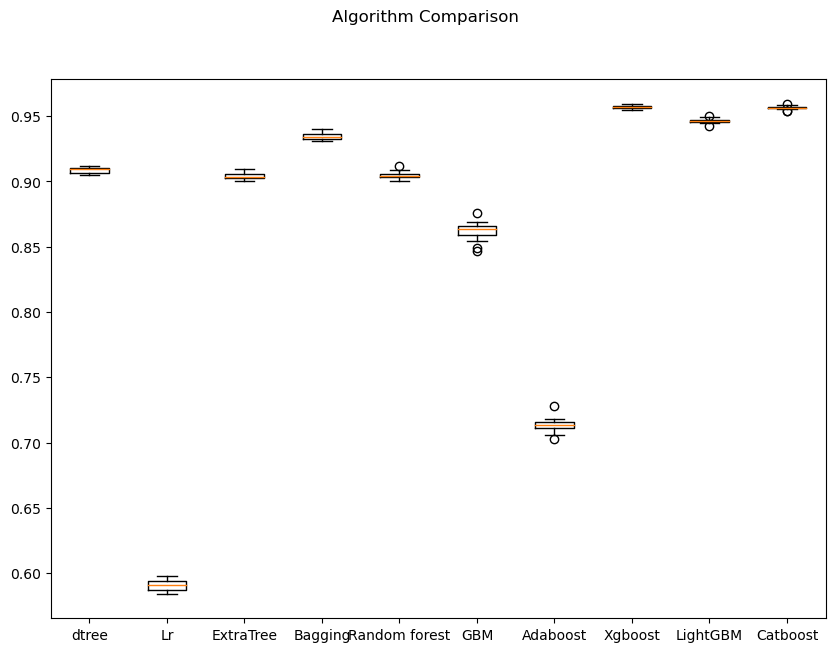

In [326]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

In [40]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)


print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0)))


print("After UnderSampling, counts of label '1': {}".format(sum(y_train_un == 1)))
print("After UnderSampling, counts of label '0': {} \n".format(sum(y_train_un == 0)))


print("After UnderSampling, the shape of train_X: {}".format(X_train_un.shape))
print("After UnderSampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before UnderSampling, counts of label '1': 2698
Before UnderSampling, counts of label '0': 39487 

After UnderSampling, counts of label '1': 2698
After UnderSampling, counts of label '0': 2698 

After UnderSampling, the shape of train_X: (5396, 100)
After UnderSampling, the shape of train_y: (5396,) 



In [41]:
%%time 

models = []  # Empty list to store all the models

# Appending models into the list
models.append(("dtree", DecisionTreeClassifier(random_state=1)))     
models.append(("Lr", LogisticRegression(random_state=1)))
models.append(("KNeighbors",KNeighborsClassifier()))
models.append(("ExtrasTree",ExtraTreesClassifier(random_state=1)))
models.append(("ExtraTree",DecisionTreeClassifier(random_state=1)))
models.append(("RidgeClassifier",RidgeClassifier()))    
models.append(("SGDClassifier",SGDClassifier()))
models.append(("BernoulliNB",BernoulliNB())) 
models.append(("SVM",SVC()))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("LightGBM", LGBMClassifier(random_state=1)))
models.append(("Catboost", CatBoostClassifier(random_state=1,verbose=False)))




results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = RepeatedStratifiedKFold(                                              
        n_splits=5,n_repeats=3, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = f1_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

dtree: 0.5206566167694521
Lr: 0.5667539755935247
KNeighbors: 0.5411374026565309
ExtrasTree: 0.5473779285362925
ExtraTree: 0.5206566167694521
RidgeClassifier: 0.5670346740297473
SGDClassifier: 0.5179240651409487
BernoulliNB: 0.500563192495427
SVM: 0.5676811287167971
Bagging: 0.5087886712999423
Random forest: 0.5542122100589212
GBM: 0.620376997591986
Adaboost: 0.6100523308028228
Xgboost: 0.5694472048848966
LightGBM: 0.5889199179465215
Catboost: 0.6112898036713356

Validation Performance:

dtree: 0.12638059025891724
Lr: 0.15384615384615383
KNeighbors: 0.13434179722672432
ExtrasTree: 0.14068299925760946
ExtraTree: 0.12638059025891724
RidgeClassifier: 0.1536740022379709
SGDClassifier: 0.1249239505171365
BernoulliNB: 0.1310165767924905
SVM: 0.14561182194990085
Bagging: 0.1362847222222222
Random forest: 0.1472582832784344
GBM: 0.16089965397923875
Adaboost: 0.15548567435359886
Xgboost: 0.150609080841639
LightGBM: 0.15286855482933914
Catboost:

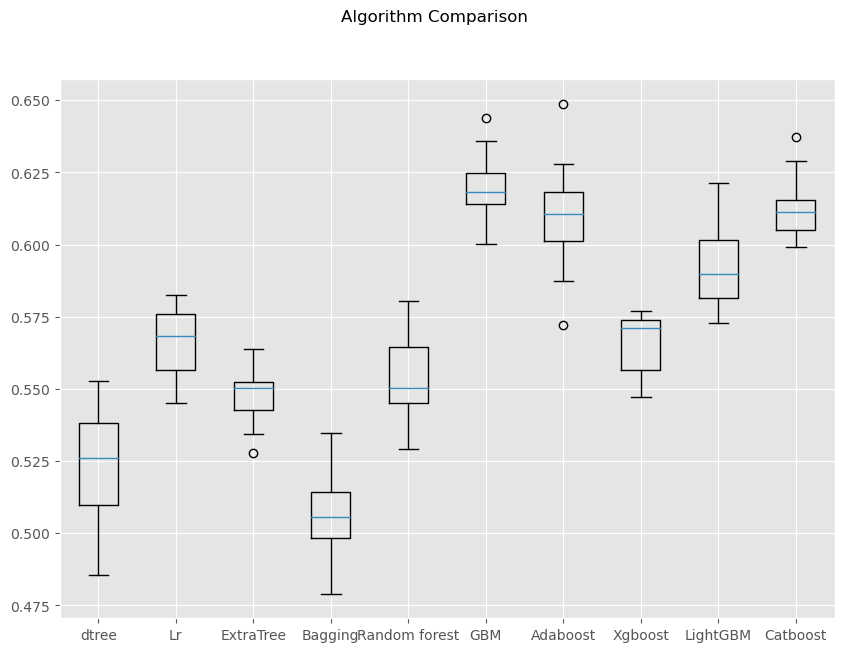

In [579]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

### Tuning catboost using under sampled data

In [ ]:
%%time

from optuna.samplers import TPESampler

def objective(trial):
    model = CatBoostClassifier(
        iterations=trial.suggest_int("iterations", 100, 1000),
        learning_rate=trial.suggest_float("learning_rate", 1e-3, 1e-1, log=True),
        depth=trial.suggest_int("depth", 4, 10),
        l2_leaf_reg=trial.suggest_float("l2_leaf_reg", 1e-8, 100.0, log=True),
        bootstrap_type=trial.suggest_categorical("bootstrap_type", ["Bayesian"]),
        random_strength=trial.suggest_float("random_strength", 1e-8, 10.0, log=True),
        bagging_temperature=trial.suggest_float("bagging_temperature", 0.0, 10.0),
        od_type=trial.suggest_categorical("od_type", ["IncToDec", "Iter"]),
        od_wait=trial.suggest_int("od_wait", 10, 50),
        verbose=True
    )
    model.fit(X_train_un, y_train_un)
    y_pred = model.predict(X_val)
    return f1_score(y_val, y_pred)

optuna.logging.set_verbosity(optuna.logging.WARNING)

sampler = TPESampler(seed=1)
study1 = optuna.create_study(study_name="catboost", direction="maximize", sampler=sampler)
study1.optimize(objective, n_trials=150)

print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

In [ ]:
catboost_tuned =CatBoostClassifier(**trial.params, verbose=False)
catboost_tuned.fit(X_train_un, y_train_un)

In [ ]:
# Calculating different metrics on train set
catboost_random_train = model_performance_classification_sklearn(
    catboost_tuned, X_train_un, y_train_un
)
print("Training performance:")
catboost_random_train

In [ ]:
# Calculating different metrics on validation set
catboost_random_val = model_performance_classification_sklearn(catboost_tuned, X_val, y_val)
print("Validation performance:")
catboost_random_val

### Tuning adaboost using under sampled data

In [ ]:
%%time

def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 50, 800)
    learning_rate = trial.suggest_float("learning_rate", 0.001, 1.0, log=True)
    model = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate, random_state=1)
    model.fit(X_train_un, y_train_un)
    y_pred = model.predict(X_val)
    return f1_score(y_val, y_pred)

sampler = TPESampler(seed=1)
study3 = optuna.create_study(direction="maximize", sampler=sampler)
study3.optimize(objective, n_trials=150)

print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

In [341]:
adaboost_tuned = AdaBoostClassifier(n_estimators=trial.params["n_estimators"], learning_rate=trial.params["learning_rate"], random_state=1)
adaboost_tuned.fit(X_train_un, y_train_un)

AdaBoostClassifier(learning_rate=0.32194463564435466, n_estimators=204,
                   random_state=1)

In [342]:
# Calculating different metrics on train set
adaboost_random_train = model_performance_classification_sklearn(
    adaboost_tuned, X_train_un, y_train_un
)
print("Training performance:")
adaboost_random_train

Training performance:


,Accuracy,Recall,Precision,F1,AUC
0,0.613,0.690,0.598,0.641,0.613


In [343]:
# Calculating different metrics on validation set
adaboost_random_val = model_performance_classification_sklearn(adaboost_tuned, X_val, y_val)
print("Validation performance:")
adaboost_random_val

Validation performance:


,Accuracy,Recall,Precision,F1,AUC
0,0.543,0.674,0.090,0.159,0.604


### Tuning LGBMboost using under sampled data

In [ ]:
%%time

def objective(trial):
    """
    Objective function to be minimized.
    """
    param = {
        "objective": "multiclass",
        "metric": "multi_logloss",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "num_class": 3,
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
        'verbose':True
    }
    gbm =LGBMClassifier(**param)
    gbm.fit(X_train_un, y_train_un)
    preds = gbm.predict(X_val)
    f1 = f1_score(y_val, preds)
    return f1

sampler = TPESampler(seed=1)
study4 = optuna.create_study(study_name="lightgbm", direction="maximize", sampler=sampler)
study4.optimize(objective, n_trials=100)

print('Best parameters:', study.best_params)

In [ ]:
lgbm_tuned =LGBMClassifier(**study.best_params)
lgbm_tuned.fit(X_train_un, y_train_un)

In [ ]:
# Calculating different metrics on train set
lgbm_random_train = model_performance_classification_sklearn(
    lgbm_tuned, X_train_un, y_train_un
)
print("Training performance:")
lgbm_random_train

In [ ]:
# Calculating different metrics on validation set
lgbm_random_val = model_performance_classification_sklearn(lgbm_tuned, X_val, y_val)
print("Validation performance:")
lgbm_random_val

### Tuning Xgbboost using under sampled data

In [345]:
%%time


def objective(trial):
    """Define the objective function"""

    params = {
        'max_depth': trial.suggest_int('max_depth', 1, 20),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 10, 1750),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_loguniform('subsample', 0.001, 1.0),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.001, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
        'scale_pos_weight':trial.suggest_loguniform('scale_pos_weight',1,10),
        'eval_metric': 'mlogloss',
        'use_label_encoder': False,
        'verbose':True
    }
    
# Fit the model
    optuna_model = XGBClassifier(**params)
    optuna_model.fit(X_train_un, y_train_un)

    # Make predictions
    y_pred = optuna_model.predict(X_val)

    # Evaluate predictions
    f1 = f1_score(y_val, y_pred)
    return f1    


study5 = optuna.create_study(direction='maximize')
study5.optimize(objective, n_trials=150)


print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))
    
    
params = trial.params
XGB_tuned = XGBClassifier(**params).fit(X_train_un, y_train_un)

[04:47:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[04:47:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[04:47:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "verbose" } might not be used.

  This could be a fa

[04:51:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[04:51:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[04:51:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "verbose" } might not be used.

  This could be a fa

[04:53:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[04:54:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[04:54:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "verbose" } might not be used.

  This could be a fa

[04:57:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[04:58:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[04:58:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "verbose" } might not be used.

  This could be a fa

[05:02:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:02:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:02:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "verbose" } might not be used.

  This could be a fa

Number of finished trials: 100
Best trial:
  Value: 0.16394045212277156
  Params: 
    max_depth: 11
    learning_rate: 0.008584893416457415
    n_estimators: 1731
    min_child_weight: 9
    gamma: 0.0055798783842791275
    subsample: 0.12197958122469879
    colsample_bytree: 0.1975711644683533
    reg_alpha: 0.16356387548434542
    reg_lambda: 5.292567693390132e-07
    scale_pos_weight: 1.0069360778332697
CPU times: total: 56min 53s
Wall time: 19min 33s


In [346]:
# Calculating different metrics on train set
XGB_random_train = model_performance_classification_sklearn(
    XGB_tuned, X_train_un, y_train_un
)
print("Training performance:")
XGB_random_train

Training performance:


,Accuracy,Recall,Precision,F1,AUC
0,0.649,0.707,0.633,0.668,0.649


In [458]:
# Calculating different metrics on validation set
XGB_random_val = model_performance_classification_sklearn(XGB_tuned, X_test, y_test)
print("Validation performance:")
XGB_random_val

Validation performance:


,Accuracy,Recall,Precision,F1,AUC
0,0.555,0.701,0.095,0.168,0.623


### Tuning GBboost using under sampled data

In [349]:
%%time

def objective(trial):
    """Define the objective function"""

    params = {
        'max_depth': trial.suggest_int('max_depth', 1, 20),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 1, 10500),
        'max_features': trial.suggest_int('max_features', 1, 9),
        'min_samples_split': trial.suggest_loguniform('min_samples_split',0.001, 1.0),
        'min_samples_leaf': trial.suggest_loguniform('min_samples_leaf',0.001, 0.5),
        'subsample': trial.suggest_loguniform('subsample', 0.001, 1.0),
        'min_weight_fraction_leaf': trial.suggest_loguniform('min_weight_fraction_leaf', 0.001,0.5),
        'max_leaf_nodes': trial.suggest_int('max_leaf_nodes', 2,100),
        'verbose':True
        
    }
    
 # Fit the model
    optuna_model = GradientBoostingClassifier(**params)
    optuna_model.fit(X_train_un, y_train_un)

    # Make predictions
    y_pred = optuna_model.predict(X_val)

    # Evaluate predictions
    f1 = f1_score(y_val, y_pred)
    return f1    


study2 = optuna.create_study(direction='maximize')
study2.optimize(objective, n_trials=100)


print('Number of finished trials: {}'.format(len(study2.trials)))
print('Best trial:')
trial = study2.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))
    
params = trial.params 
GBM_tuned = GradientBoostingClassifier(**params).fit(X_train_un, y_train_un)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.3863          -0.0000           22.57s
         2           1.3862          -0.0000           26.18s
         3           1.3863          -0.0000           24.89s
         4           1.3863          -0.0000           24.18s
         5           1.3863          -0.0000           23.81s
         6           1.3862          -0.0000           22.32s
         7           1.3863           0.0000           22.32s
         8           1.3861          -0.0001           21.38s
         9           1.3864           0.0000           21.48s
        10           1.3861          -0.0001           20.82s
        20           1.3863          -0.0000           18.94s
        30           1.3857          -0.0002           20.12s
        40           1.3863          -0.0000           19.52s
        50           1.3865          -0.0000           19.00s
        60           1.3863          -0.0000           18.52s
       

      5000           1.3337          -0.0000            2.94s
      6000           1.3429          -0.0009            0.24s
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.3861           0.0000           10.66s
         2           1.3861           0.0000           10.65s
         3           1.3861           0.0001            9.76s
         4           1.3859           0.0000            9.98s
         5           1.3859           0.0001           10.11s
         6           1.3859           0.0000            9.75s
         7           1.3860           0.0000            9.87s
         8           1.3858           0.0000           10.63s
         9           1.3858           0.0001           11.22s
        10           1.3856           0.0001           11.42s
        20           1.3848           0.0001           12.96s
        30           1.3844           0.0000           14.49s
        40           1.3831           0.0001           14.14s
       

        20           1.3279           0.0023           12.65s
        30           1.3234          -0.0001           14.68s
        40           1.2962          -0.0006           14.24s
        50           1.2666          -0.0008           13.83s
        60           1.2625           0.0011           13.54s
        70           1.2968          -0.0003           13.23s
        80           1.2873          -0.0005           13.28s
        90           1.3144          -0.0005           13.16s
       100           1.2833          -0.0003           13.09s
       200           1.2730          -0.0012           12.33s
       300           1.2668          -0.0008           12.34s
       400           1.2429          -0.0003           12.73s
       500           1.2653          -0.0015           12.74s
       600           1.2418          -0.0010           12.85s
       700           1.2228          -0.0001           12.33s
       800           1.2298          -0.0014           11.92s
       9

        90           1.3863          -0.0000            4.52s
       100           1.3863          -0.0000            4.43s
       200           1.3863          -0.0000            3.88s
       300           1.3863          -0.0000            3.59s
       400           1.3863           0.0000            3.31s
       500           1.3863          -0.0000            3.06s
       600           1.3863          -0.0000            2.86s
       700           1.3863          -0.0000            2.63s
       800           1.3863          -0.0000            2.41s
       900           1.3863          -0.0000            2.20s
      1000           1.3863          -0.0000            2.00s
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.3863          -0.0000           20.69s
         2           1.3863          -0.0000           20.70s
         3           1.3863          -0.0000           20.69s
         4           1.3863          -0.0000           23.29s
       

      7000           1.3220           0.0000            5.37s
      8000           1.3347          -0.0000            2.88s
      9000           1.3269          -0.0000            0.44s
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.3861           0.0002            5.69s
         2           1.3860           0.0000            6.80s
         3           1.3860          -0.0000            7.83s
         4           1.3859           0.0000            7.35s
         5           1.3859           0.0002            7.46s
         6           1.3858           0.0000            7.20s
         7           1.3858           0.0000            7.30s
         8           1.3856           0.0001            7.86s
         9           1.3855           0.0000            7.86s
        10           1.3856           0.0000            7.87s
        20           1.3843           0.0005            7.44s
        30           1.3840          -0.0000            7.41s
       

        60           1.3688          -0.0000           14.38s
        70           1.3638           0.0014           14.27s
        80           1.3600           0.0000           14.45s
        90           1.3584           0.0001           14.38s
       100           1.3550          -0.0000           14.30s
       200           1.3342           0.0003           13.83s
       300           1.3288           0.0000           13.38s
       400           1.3204          -0.0001           12.97s
       500           1.3170          -0.0000           12.63s
       600           1.3038          -0.0000           12.25s
       700           1.3058          -0.0001           11.88s
       800           1.3025          -0.0001           11.48s
       900           1.2996          -0.0002           11.10s
      1000           1.2892          -0.0001           10.71s
      2000           1.2721          -0.0001            6.81s
      3000           1.2588          -0.0001            3.25s
      It

      1000           1.2509          -0.0002            0.14s
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.3665           0.0070            1.20s
         2           1.3670           0.0007            1.20s
         3           1.3561           0.0079            1.19s
         4           1.3623           0.0016            1.11s
         5           1.3430           0.0032            1.07s
         6           1.3523          -0.0016            1.18s
         7           1.3388           0.0018            1.13s
         8           1.3602           0.0005            1.10s
         9           1.3469           0.0002            1.07s
        10           1.3330           0.0069            1.11s
        20           1.3138          -0.0012            1.08s
        30           1.2963           0.0005            1.07s
        40           1.3063          -0.0009            1.02s
        50           1.3051          -0.0014            0.93s
       

        70           1.3785          -0.0001            4.06s
        80           1.3663           0.0000            4.01s
        90           1.3668           0.0002            3.97s
       100           1.3645           0.0001            3.85s
       200           1.3602          -0.0000            3.99s
       300           1.3594          -0.0001            3.54s
       400           1.3413          -0.0001            3.10s
       500           1.3241          -0.0000            2.73s
       600           1.3212          -0.0000            2.31s
       700           1.3306          -0.0000            1.91s
       800           1.3213          -0.0001            1.53s
       900           1.3331          -0.0001            1.19s
      1000           1.3099          -0.0000            0.86s
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.3848           0.0011           11.00s
         2           1.3851          -0.0001            9.09s
       

       900           1.2755          -0.0000           15.56s
      1000           1.2697          -0.0000           14.87s
      2000           1.2633          -0.0000            9.51s
      3000           1.2349          -0.0001            4.34s
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.3853           0.0000           20.81s
         2           1.3844           0.0007           20.79s
         3           1.3831           0.0008           23.11s
         4           1.3850           0.0002           24.26s
         5           1.3803           0.0003           23.56s
         6           1.3828           0.0000           21.94s
         7           1.3811           0.0000           21.78s
         8           1.3843           0.0000           21.65s
         9           1.3809           0.0008           23.09s
        10           1.3848           0.0000           22.16s
        20           1.3799          -0.0001           19.71s
       

       800           1.2622          -0.0004           22.44s
       900           1.2765          -0.0003           22.04s
      1000           1.2353          -0.0008           21.44s
      2000           1.2127          -0.0001           16.81s
      3000           1.1997          -0.0001           13.77s
      4000           1.1778          -0.0005           10.66s
      5000           1.1852          -0.0005            6.99s
      6000           1.1515          -0.0004            3.27s
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.3835          -0.0004           21.75s
         2           1.3706          -0.0026           21.76s
         3           1.3908           0.0019           18.12s
         4           1.3872           0.0004           14.94s
         5           1.3859           0.0001           15.21s
         6           1.3847          -0.0002           13.58s
         7           1.3840          -0.0004           13.19s
       

       600           1.2958          -0.0001           26.57s
       700           1.3028          -0.0000           25.91s
       800           1.2998          -0.0001           25.31s
       900           1.2960          -0.0001           24.70s
      1000           1.2897          -0.0001           24.23s
      2000           1.2650          -0.0001           19.24s
      3000           1.2549          -0.0001           15.18s
      4000           1.2507          -0.0001           11.04s
      5000           1.2481          -0.0001            5.63s
      6000           1.2406          -0.0001            0.48s
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.3863          -0.0000           13.67s
         2           1.3862          -0.0000           13.14s
         3           1.3862          -0.0000           11.62s
         4           1.3862          -0.0000           10.81s
         5           1.3861          -0.0000           10.33s
       

        60           1.3818          -0.0000           27.67s
        70           1.3817          -0.0000           28.31s
        80           1.3812          -0.0000           27.77s
        90           1.3808           0.0001           27.25s
       100           1.3799          -0.0000           26.75s
       200           1.3730          -0.0000           24.63s
       300           1.3697          -0.0000           27.98s
       400           1.3622          -0.0000           26.16s
       500           1.3625           0.0000           24.94s
       600           1.3589          -0.0000           24.42s
       700           1.3565           0.0000           23.99s
       800           1.3489          -0.0000           23.32s
       900           1.3569          -0.0000           22.67s
      1000           1.3511          -0.0000           22.48s
      2000           1.3495          -0.0000           20.32s
      3000           1.3512          -0.0000           17.83s
      40

        80           1.3621           0.0005            7.94s
        90           1.3582           0.0004            8.00s
       100           1.3572          -0.0000            7.92s
       200           1.3463          -0.0001            7.65s
       300           1.3298           0.0001            7.44s
       400           1.3140          -0.0000            7.14s
       500           1.3167          -0.0000            6.88s
       600           1.3246          -0.0000            6.72s
       700           1.3170          -0.0001            6.48s
       800           1.2946          -0.0001            6.18s
       900           1.3213          -0.0001            5.85s
      1000           1.2926          -0.0001            5.54s
      2000           1.3084          -0.0001            2.55s
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.3862          -0.0000           11.19s
         2           1.3863           0.0000            9.27s
       

       900           1.2710          -0.0002           12.61s
      1000           1.2651          -0.0001           11.82s
      2000           1.2419          -0.0001            5.24s
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.3863          -0.0000           14.94s
         2           1.3863          -0.0000           12.44s
         3           1.3854          -0.0001           11.61s
         4           1.3857          -0.0001           12.44s
         5           1.3855          -0.0001           11.94s
         6           1.3854          -0.0001           11.60s
         7           1.3869           0.0000           11.36s
         8           1.3859          -0.0000           11.18s
         9           1.3866           0.0000           10.49s
        10           1.3865           0.0000           10.43s
        20           1.3866           0.0000           10.41s
        30           1.3874           0.0001           10.23s
       

        60           1.3841           0.0001            0.05s
        70           1.3835           0.0000            0.01s
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.3863           0.0000            1.50s
         2           1.3863           0.0000            1.75s
         3           1.3860           0.0002            1.66s
         4           1.3855           0.0004            1.74s
         5           1.3856           0.0000            1.79s
         6           1.3853           0.0002            1.82s
         7           1.3853          -0.0000            1.84s
         8           1.3853           0.0000            1.79s
         9           1.3852          -0.0000            1.75s
        10           1.3852           0.0000            1.77s
        20           1.3849          -0.0000            1.74s
        30           1.3838           0.0002            1.70s
        40           1.3836           0.0000            1.67s
       

       200           1.3713           0.0001            5.27s
       300           1.3660           0.0002            4.75s
       400           1.3606           0.0001            4.26s
       500           1.3561           0.0001            3.71s
       600           1.3524           0.0003            3.17s
       700           1.3469           0.0001            2.64s
       800           1.3421          -0.0000            2.06s
       900           1.3392           0.0000            1.48s
      1000           1.3371           0.0001            0.91s
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.3861           0.0002            8.38s
         2           1.3861          -0.0000            7.68s
         3           1.3859           0.0001            7.44s
         4           1.3858           0.0001            6.97s
         5           1.3857          -0.0000            6.97s
         6           1.3857           0.0000            6.73s
       

        50           1.3857           0.0000            8.30s
        60           1.3857           0.0000            8.10s
        70           1.3854          -0.0000            8.11s
        80           1.3853          -0.0000            8.13s
        90           1.3852           0.0000            8.00s
       100           1.3851           0.0000            7.92s
       200           1.3837           0.0000            7.20s
       300           1.3824           0.0001            6.67s
       400           1.3809           0.0001            6.12s
       500           1.3796           0.0002            5.76s
       600           1.3785          -0.0000            5.25s
       700           1.3772           0.0000            4.80s
       800           1.3760          -0.0000            4.25s
       900           1.3750           0.0000            3.73s
      1000           1.3738           0.0000            3.24s
      Iter       Train Loss      OOB Improve   Remaining Time 
       

        60           1.3794           0.0000            7.53s
        70           1.3781          -0.0001            7.50s
        80           1.3768          -0.0000            7.45s
        90           1.3753           0.0002            7.41s
       100           1.3749           0.0000            7.29s
       200           1.3671          -0.0001            6.73s
       300           1.3601           0.0001            6.35s
       400           1.3545          -0.0000            6.03s
       500           1.3499           0.0000            5.68s
       600           1.3448          -0.0001            5.36s
       700           1.3408           0.0000            4.87s
       800           1.3378          -0.0000            4.45s
       900           1.3337          -0.0000            3.99s
      1000           1.3307          -0.0001            3.54s
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.3863           0.0000            5.44s
       

        40           1.3822           0.0000            6.94s
        50           1.3811           0.0000            7.08s
        60           1.3800           0.0001            7.12s
        70           1.3786           0.0003            7.16s
        80           1.3770           0.0000            7.14s
        90           1.3759           0.0000            7.18s
       100           1.3748           0.0001            8.15s
       200           1.3659          -0.0000            9.30s
       300           1.3579           0.0000            8.22s
       400           1.3522          -0.0000            8.90s
       500           1.3446           0.0001            7.78s
       600           1.3389           0.0000            6.51s
       700           1.3375           0.0000            5.05s
       800           1.3309          -0.0000            3.67s
       900           1.3242           0.0000            2.39s
      1000           1.3258           0.0000            1.11s
      It

        40           1.3823           0.0001            3.02s
        50           1.3815           0.0002            3.03s
        60           1.3805          -0.0000            3.00s
        70           1.3805           0.0000            2.95s
        80           1.3787           0.0002            2.95s
        90           1.3786          -0.0000            2.87s
       100           1.3780           0.0001            2.80s
       200           1.3717          -0.0000            2.20s
       300           1.3652           0.0001            1.57s
       400           1.3592           0.0001            0.91s
       500           1.3554           0.0001            0.25s
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.3862           0.0001            2.14s
         2           1.3862          -0.0000            1.74s
         3           1.3861           0.0000            1.59s
         4           1.3861           0.0000            1.52s
       

        80           1.3733           0.0000            3.14s
        90           1.3714           0.0004            3.09s
       100           1.3708           0.0001            3.02s
       200           1.3606           0.0002            2.52s
       300           1.3493           0.0000            1.92s
       400           1.3439           0.0001            1.29s
       500           1.3350           0.0000            0.66s
       600           1.3268          -0.0000            0.03s
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.3863           0.0000            0.94s
         2           1.3862           0.0001            0.94s
         3           1.3861           0.0000            1.01s
         4           1.3861           0.0000            0.99s
         5           1.3861           0.0000            0.97s
         6           1.3861           0.0000            0.96s
         7           1.3860          -0.0000            0.98s
       

        20           1.3833           0.0002            0.01s
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.3862           0.0001            2.67s
         2           1.3862           0.0000            2.67s
         3           1.3862           0.0000            2.49s
         4           1.3861           0.0001            2.66s
         5           1.3860           0.0000            2.55s
         6           1.3860           0.0000            2.56s
         7           1.3860           0.0000            2.64s
         8           1.3859           0.0001            2.57s
         9           1.3859           0.0001            2.57s
        10           1.3859           0.0000            2.52s
        20           1.3857           0.0000            2.48s
        30           1.3853           0.0000            2.50s
        40           1.3850           0.0001            2.47s
        50           1.3848           0.0001            2.45s
       

In [499]:
# Calculating different metrics on train set
GBM_random_train = model_performance_classification_sklearn(
    GBM_tuned, X_train_un, y_train_un
)
print("Training performance:")
GBM_random_train

Training performance:


,Accuracy,Recall,Precision,F1,AUC
0,0.614,0.662,0.604,0.632,0.614


In [500]:
# Calculating different metrics on validation set
GBM_random_val = model_performance_classification_sklearn(GBM_tuned, X_val, y_val)
print("Validation performance:")
GBM_random_val

Validation performance:


,Accuracy,Recall,Precision,F1,AUC
0,0.578,0.634,0.092,0.161,0.604


### Stacking

In [355]:
%%time

estimators = [('Cat Boosting',catboost_tuned), ('XGB Boosting',XGB_tuned),
              ('GBM',GBM_tuned),('adaboost',adaboost_tuned)
             ]

final_estimator = catboost_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train_un,y_train_un)

CPU times: total: 4min 50s
Wall time: 2min 4s


StackingClassifier(estimators=[('Cat Boosting',
                                <catboost.core.CatBoostClassifier object at 0x0000026E2F6192E0>),
                               ('XGB Boosting',
                                XGBClassifier(base_score=0.5, booster='gbtree',
                                              callbacks=None,
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=0.1975711644683533,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              gamma=0.00557987838427...
                                                           max_leaf_nodes=100,
                                                           min_samples_leaf=0.002052637

In [356]:
# Calculating different metrics on train set
Stacking_random_train = model_performance_classification_sklearn(
    stacking_classifier, X_train_un, y_train_un
)
print("Training performance:")
Stacking_random_train

Training performance:


,Accuracy,Recall,Precision,F1,AUC
0,0.580,0.617,0.574,0.595,0.580


In [357]:
# Calculating different metrics on validation set
Stacking_random_val = model_performance_classification_sklearn(stacking_classifier, X_val, y_val)
print("Validation performance:")
Stacking_random_val

Validation performance:


,Accuracy,Recall,Precision,F1,AUC
0,0.535,0.600,0.080,0.142,0.565


### LGBMTuner with under sampled data


 * Initiating LGBMTuner.fit
     . Settings:
     .. Trying 2000 trials
     .. Evaluation metric: f1 
     .. Study direction: minimize log_loss

     . Trial number: 0 finished
     .. Optimization score (lower-better): log_loss: 0.6673818278205504
     .. Evaluation score (greater-better): f1: 0.5934065934065935
 ...........................................................................
     . Trial number: 1 finished
     .. Optimization score (lower-better): log_loss: 0.6683057021796586
     .. Evaluation score (greater-better): f1: 0.6004319654427647
 ...........................................................................
     . Trial number: 2 finished
     .. Optimization score (lower-better): log_loss: 0.6634238571274269
     .. Evaluation score (greater-better): f1: 0.6235795454545455
 ...........................................................................
     . Trial number: 3 finished
     .. Optimization score (lower-better): log_loss: 0.6678867428230985
     ..

     . Trial number: 621 finished
     .. Optimization score (lower-better): log_loss: 0.6555971668365383
     .. Evaluation score (greater-better): f1: 0.6189111747851004
 ...........................................................................
     . Trial number: 833 finished
     .. Optimization score (lower-better): log_loss: 0.6602124319491331
     .. Evaluation score (greater-better): f1: 0.6144927536231884
 ...........................................................................
     . Trial number: 1002 finished
     .. Optimization score (lower-better): log_loss: 0.6619759429072496
     .. Evaluation score (greater-better): f1: 0.6069364161849711
 ...........................................................................
     . Trial number: 1003 finished
     .. Optimization score (lower-better): log_loss: 0.6598663861220556
     .. Evaluation score (greater-better): f1: 0.6260623229461757
 ...........................................................................
  

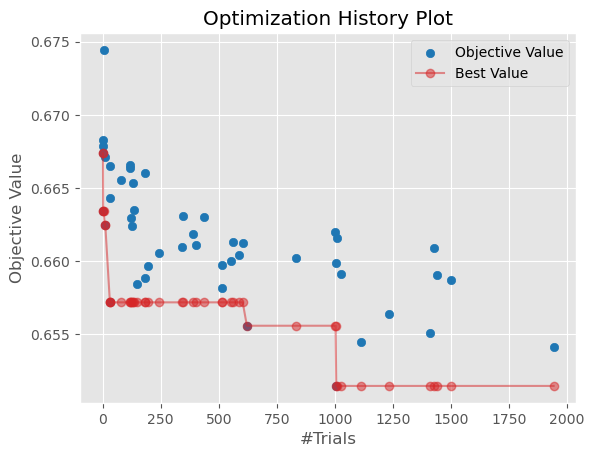

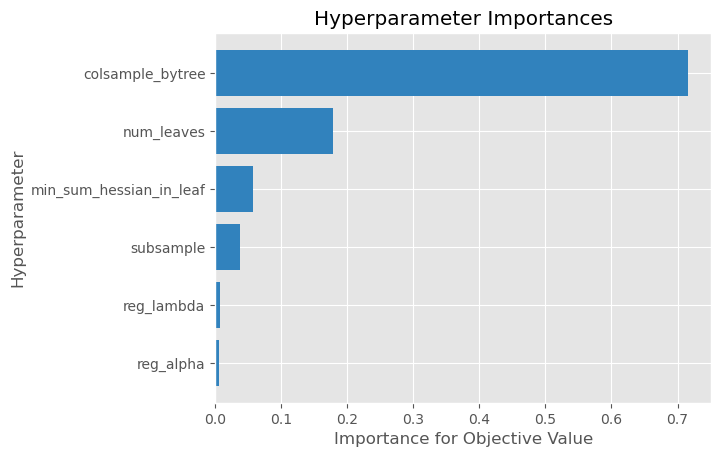

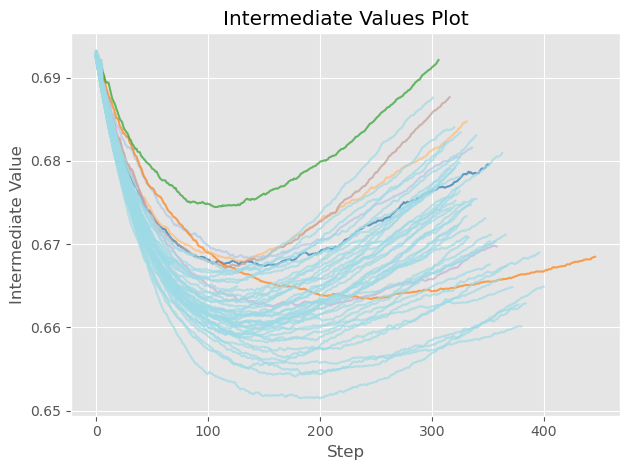

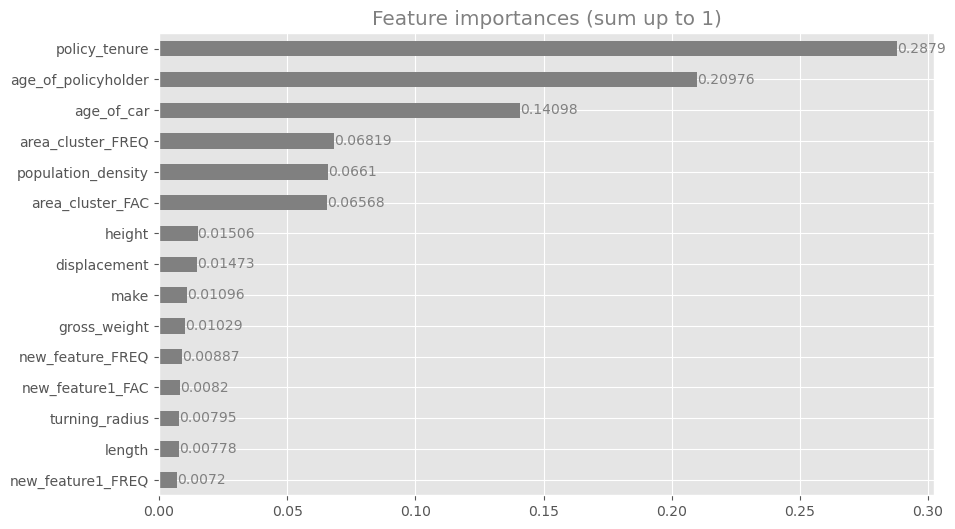


     . Optuna hyperparameters optimization finished
     .. Best trial number:1006    |     log_loss:           0.6514857194408608
 ---------------------------------------------------------------------------
     . n_estimators optimization finished
     .. best iteration:   72   |     f1:           0.6306818181818181

Time elapsed for fit execution: 10 min 25.034 sec


In [358]:
tuner = LGBMTuner(metric = 'f1',seed=999,trials=2000)
tuner.fit(X_train_un, y_train_un)

In [359]:
# Calculating different metrics on train set
tuner_random_train = model_performance_classification_sklearn(
    tuner, X_train_un, y_train_un
)
print("Training performance:")
tuner_random_train

Training performance:


,Accuracy,Recall,Precision,F1,AUC
0,0.777,0.799,0.765,0.781,0.777


In [360]:
# Calculating different metrics on validation set
tuner_random_val = model_performance_classification_sklearn(tuner, X_val, y_val)
print("Validation performance:")
tuner_random_val

Validation performance:


,Accuracy,Recall,Precision,F1,AUC
0,0.572,0.636,0.091,0.160,0.602


In [495]:
pred = XGB_tuned.predict(data1)

In [496]:
target=pd.DataFrame(pred, columns = ['predicted'])
data1['default']=target['predicted']

In [497]:
data1.to_csv('test60.csv')

In [82]:
def get_pipeline(X, model):
    """Return a pipeline to preprocess data and bundle with a model.
    
    Args:
        X (object): X_train data. 
        model (object): scikit-learn model object, i.e. XGBClassifier
    
    Returns: 
        Pipeline (object): Pipeline steps. 
    """
    
    numeric_columns = list(X.select_dtypes(exclude=['object']).columns.values.tolist())    
    categorical_columns = list(X.select_dtypes(include=['object']).columns.values.tolist())
    numeric_pipeline = SimpleImputer(strategy='constant')
    #categorical_pipeline = OneHotEncoder(handle_unknown='ignore')

    preprocessor = ColumnTransformer(
        transformers=[
            ('numeric', numeric_pipeline, numeric_columns),
            #('categorical', categorical_pipeline, categorical_columns),
            ], remainder='passthrough'
    )

    bundled_pipeline = imbpipeline(steps=[
        ('preprocessor', preprocessor),
        #('NearMiss', NearMiss(random_state=1)),
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    
    return bundled_pipeline

In [83]:
import time

In [84]:
def select_model(X, y, pipeline=None):
    """Test a range of classifiers and return their performance metrics on training data.
    
    Args:
        X (object): Pandas dataframe containing X_train data. 
        y (object): Pandas dataframe containing y_train data. 
        pipeline (object): Pipeline from get_pipeline().

    Return:
        df (object): Pandas dataframe containing model performance data. 
    """
    
    classifiers = {}
    classifiers.update({"DummyClassifier": DummyClassifier(strategy='most_frequent')})
    classifiers.update({"XGBClassifier": XGBClassifier(use_label_encoder=False, 
                                                       eval_metric='logloss',
                                                       objective='binary:logistic',
                                                      )})
    classifiers.update({"LGBMClassifier": LGBMClassifier()})
    classifiers.update({"RandomForestClassifier": RandomForestClassifier()})
    classifiers.update({"DecisionTreeClassifier": DecisionTreeClassifier()})
    classifiers.update({"ExtraTreeClassifier": ExtraTreeClassifier()})
    classifiers.update({"ExtraTreesClassifier": ExtraTreeClassifier()})    
    classifiers.update({"AdaBoostClassifier": AdaBoostClassifier()})
    classifiers.update({"KNeighborsClassifier": KNeighborsClassifier()})
    classifiers.update({"RidgeClassifier": RidgeClassifier()})
    classifiers.update({"SGDClassifier": SGDClassifier()})
    classifiers.update({"BaggingClassifier": BaggingClassifier()})
    classifiers.update({"BernoulliNB": BernoulliNB()})
    classifiers.update({"SVC": SVC()})
    classifiers.update({"CatBoostClassifier":CatBoostClassifier(silent=True)})
    
    # Stacking
    models = []

    models = []
    models.append(('XGBClassifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', objective='binary:logistic')))
    models.append(('CatBoostClassifier', CatBoostClassifier(silent=True)))
    models.append(('BaggingClassifier', BaggingClassifier()))
    classifiers.update({"VotingClassifier (XGBClassifier, CatBoostClassifier, BaggingClassifier)": VotingClassifier(models)})

    models = []
    models.append(('XGBClassifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', objective='binary:logistic')))
    models.append(('LGBMClassifier', LGBMClassifier()))
    models.append(('CatBoostClassifier', CatBoostClassifier(silent=True)))
    classifiers.update({"VotingClassifier (XGBClassifier, LGBMClassifier, CatBoostClassifier)": VotingClassifier(models)})
    
    models = []
    models.append(('XGBClassifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', objective='binary:logistic')))
    models.append(('RandomForestClassifier', RandomForestClassifier()))
    models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
    classifiers.update({"VotingClassifier (XGBClassifier, RandomForestClassifier, DecisionTreeClassifier)": VotingClassifier(models)})

    models = []
    models.append(('XGBClassifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', objective='binary:logistic')))
    models.append(('AdaBoostClassifier', AdaBoostClassifier()))
    models.append(('ExtraTreeClassifier', ExtraTreeClassifier()))
    classifiers.update({"VotingClassifier (XGBClassifier, AdaBoostClassifier, ExtraTreeClassifier)": VotingClassifier(models)})
    
    models = []
    models.append(('XGBClassifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', objective='binary:logistic')))
    models.append(('ExtraTreesClassifier', ExtraTreesClassifier()))
    classifiers.update({"VotingClassifier (XGBClassifier, ExtraTreesClassifier)": VotingClassifier(models)})    
    
    df_models = pd.DataFrame(columns=['model', 'run_time', 'f1'])

    for key in classifiers:
        
        start_time = time.time()

        pipeline = get_pipeline(X_train_un, classifiers[key])
        
        cv = cross_val_score(pipeline, X, y, cv=5, scoring='f1')

        row = {'model': key,
               'run_time': format(round((time.time() - start_time)/60,2)),
               'f1': cv.mean(),
        }

        df_models = df_models.append(row, ignore_index=True)
        
    df_models = df_models.sort_values(by='f1', ascending=False)
    return df_models

In [87]:
models = select_model(X_train_un, y_train_un)
models.head(20)

,model,run_time,f1
14,CatBoostClassifier,0.87,0.615
7,AdaBoostClassifier,0.07,0.610
16,"VotingClassifier (XGBClassifier, LGBMClassifie...",0.99,0.597
2,LGBMClassifier,0.04,0.590
18,"VotingClassifier (XGBClassifier, AdaBoostClass...",0.23,0.585
15,"VotingClassifier (XGBClassifier, CatBoostClass...",1.04,0.585
9,RidgeClassifier,0.03,0.568
13,SVC,0.36,0.568
1,XGBClassifier,0.15,0.563
17,"VotingClassifier (XGBClassifier, RandomForestC...",0.28,0.562
